Objective:
To analyze and visualize the user ratings for different app genres in our dataset, identifying key insights to inform our strategy and decision-making.

Import libraries for data analysis and visualization purposes

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df_dataset = pd.read_csv('AppleStore.csv')

In [8]:
df_dataset.head(5)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [9]:
df_dataset.shape

(7197, 16)

Group by genre and their average ratings

In [32]:
df_grouped_by_genre = df_dataset.groupby('prime_genre')['user_rating'].mean().reset_index()
df_grouped_by_genre.head(5)

,prime_genre,user_rating
0,Book,2.477679
1,Business,3.745614
2,Catalogs,2.100000
3,Education,3.376380
4,Entertainment,3.246729


Create an object that represents the total number of each value in the "prime_genre" 

In [34]:
genre_counts = df_dataset['prime_genre'].value_counts()

In [35]:
top_5_genres = genre_counts.head(5)
top_5_genres, print(type(top_5_genres))

<class 'pandas.core.series.Series'>


(Games            3862
 Entertainment     535
 Education         453
 Photo & Video     349
 Utilities         248
 Name: prime_genre, dtype: int64,
 None)

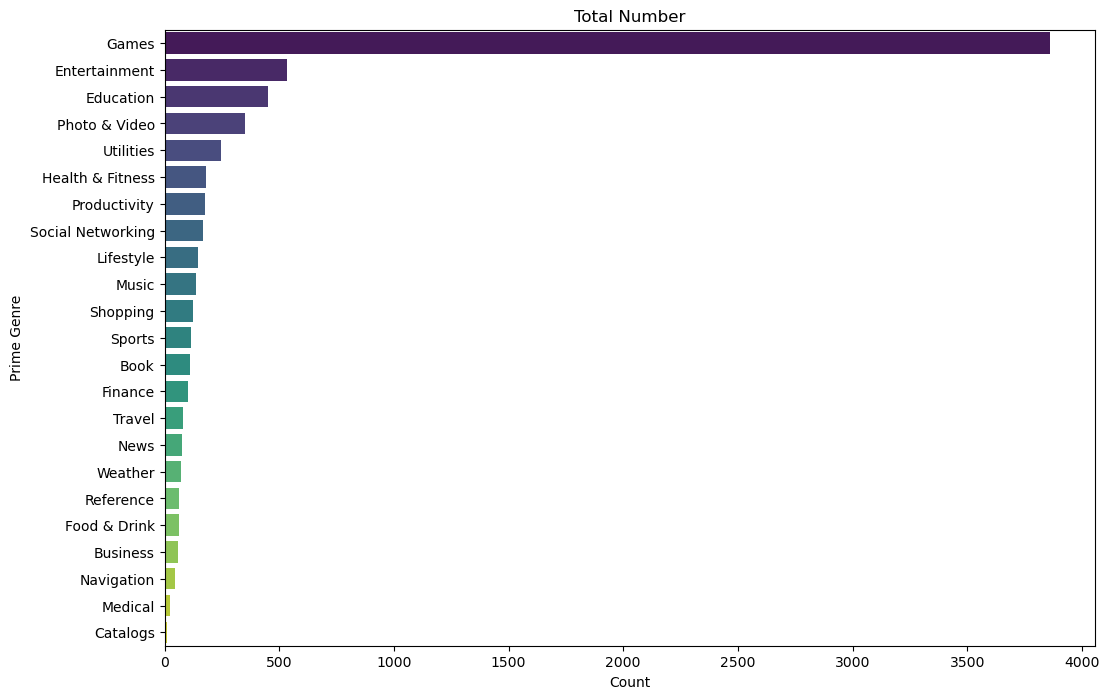

In [36]:
# Group by 'prime_genre' and count the occurrences
df_grouped_by_genre_count = df_dataset.groupby('prime_genre')['id'].count().reset_index()

# Rename the columns for better clarity (optional)
df_grouped_by_genre_count.columns = ['prime_genre', 'count']

# Sort the counts in descending order
df_grouped_by_genre_count = df_grouped_by_genre_count.sort_values(by='count', ascending=False)

# Create a bar plot to visualize the counts
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='prime_genre', data=df_grouped_by_genre_count, palette='viridis')
plt.title('Total Number')
plt.xlabel('Count')
plt.ylabel('Prime Genre')
plt.show()

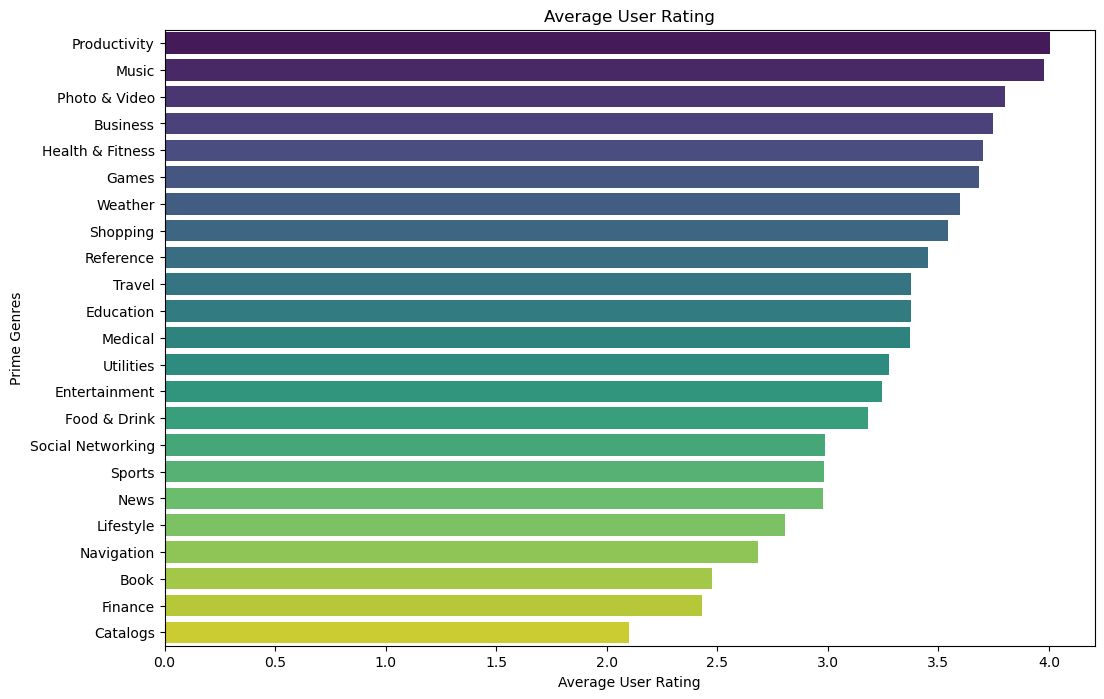

In [37]:
# Group by 'prime_genre' and calculate the mean of 'user_rating'
df_grouped_by_genre_rating = df_dataset.groupby('prime_genre')['user_rating'].mean().reset_index()

# Rename the columns for better clarity (optional)
df_grouped_by_genre_rating.columns = ['prime_genre', 'average_user_rating']

# Sort the averages in descending order
df_grouped_by_genre_rating = df_grouped_by_genre_rating.sort_values(by='average_user_rating', ascending=False)

# Create a bar plot to visualize the average user ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='average_user_rating', y='prime_genre', data=df_grouped_by_genre_rating, palette='viridis')
plt.title('Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('Prime Genres')
plt.show()

Price & Genre

In [38]:
df_genre_price = df_dataset.groupby('prime_genre')['price'].mean().reset_index()

In [39]:
df_genre_price.sort_values(by= 'price', ascending = False).head(10)

,prime_genre,price
10,Medical,8.776087
1,Business,5.116316
16,Reference,4.836875
11,Music,4.835435
15,Productivity,4.330562
12,Navigation,4.124783
3,Education,4.028234
8,Health & Fitness,1.916444
0,Book,1.790536
21,Utilities,1.647621


<Axes: xlabel='prime_genre', ylabel='price'>

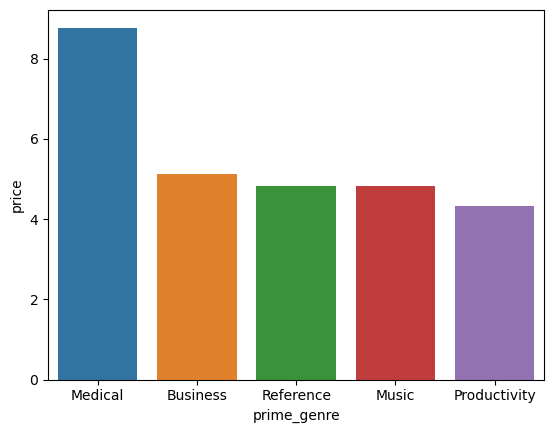

In [40]:
sns.barplot(data =df_genre_price.sort_values(by = 'price', ascending = False).head(5), x = 'prime_genre', y = 'price' )

To conclude, our analysis reveals key insights into the distribution and user satisfaction of apps across different genres. The visualizations highlight the most saturated and highest-rated genres, providing valuable information for strategic decisions such as market positioning, app development focus, and potential areas for improvement.